In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import urllib
import cv2
import seaborn as sns

In [15]:
#data = np.load('data/X.npy')
df = pd.read_csv('data/dress.csv')

In [16]:
df.head()

,_unit_id,category,category:confidence,image_url
0,851505458,ikat,0.3487,http://s3-eu-west-1.amazonaws.com/we-attribute...
1,851505459,plain,1.0000,http://s3-eu-west-1.amazonaws.com/we-attribute...
2,851505460,polka dot,0.6709,http://s3-eu-west-1.amazonaws.com/we-attribute...
3,851505461,plain,1.0000,http://s3-eu-west-1.amazonaws.com/we-attribute...
4,851505462,geometry,0.7035,http://s3-eu-west-1.amazonaws.com/we-attribute...


In [17]:
def get_image(img_url):
    response = urllib.request.urlopen(img_url)
    img = np.asarray(bytearray(response.read()),dtype='uint8')
    img = cv2.imdecode(img, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)

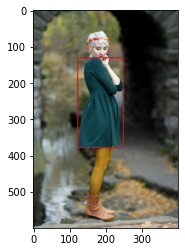

In [18]:
get_image(df.image_url[420])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15702 entries, 0 to 15701
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   _unit_id             15702 non-null  int64  
 1   category             15702 non-null  object 
 2   category:confidence  15702 non-null  float64
 3   image_url            15702 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 490.8+ KB


In [20]:
df.category.unique()

array(['ikat', 'plain', 'polka dot', 'geometry', 'floral', 'squares',
       'scales', 'animal', 'OTHER', 'stripes', 'tribal', 'houndstooth',
       'cartoon', 'chevron', 'stars', 'letter_numb', 'skull'],
      dtype=object)

In [21]:
print('Total number of category:',len(df.category.unique()))

Total number of category: 17


In [22]:
df = df.loc[df.category!='OTHER'].reset_index(drop=True)

In [23]:
df.shape

(15189, 4)

### Create a mask that detects the red rectangular tags present in each image

In [34]:
def image_processing(img_url):
    response = urllib.request.urlopen(img_url)
    img = np.asarray(bytearray(response.read()),dtype='uint8')
    img_bgr = cv2.imdecode(img,cv2.IMREAD_COLOR)
    img_hsv = cv2.cvtColor(img_bar,cv2.COLOR_BGR2HSV)
    img_gray = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2GRAY)
    img_rgb = cv2.imdecode(img, cv2.COLOR_BGR2GRAY)
    img_masked = cv2.inRange(img_hsv,(0,255,255),(0,255,255))

In [61]:
if len(np.where(img_masked != 0)[0]) != 0:
    print(min(np.where(img_masked != 0)[0]))
    print(max(np.where(img_masked != 0)[0]))


172
585


In [65]:
np.where(img_masked != 0)

(array([172, 172, 172, ..., 585, 585, 585]),
 array([ 94,  95,  96, ..., 303, 304, 305]))

In [46]:
for i in range(len(np.where(img_masked != 0))):
    print(len(mask[0]))

3728
3728


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)